In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
def avg(l):
    return sum(l)/len(l)


def graph(x, y, color='r', fit_line=True, connect=False):
    plt.figure(figsize=(12,7))
    if connect:
        plt.plot(x, y, color + '-o')
    else:
        plt.plot(x, y, color + 'o')

    A = np.vstack([x, np.ones(len(x))]).T
    line, resid = np.linalg.lstsq(A, y, rcond=None)[:2] # fit line
    k, n = line[0], line[1]
    yfit = [k * xi + n for xi in x]
    print(resid)
    if fit_line: plt.plot(x, yfit)
    return (line[0], line[1], resid / (len(y) * np.var(y)))

def count(i):
    s, n = 0, 0
    with open('data/{}.txt'.format(i), 'r') as f:
        for line in f:
            s += int(line.split()[1])
            n += 1
    return s, n

In [42]:
bcg = count(26)[0]/915*60
print('bcg:', bcg)

sums = []

for i in range(10):
    sums.append(count(i+1)[0] - bcg)
            
print(sums)
average = avg(sums)
print('average:', str(average))
print('sigma:', str(average**0.5))

err = 0
for s in sums:
    err += (s - average)**2
err /= len(sums)
err = err**0.5
print('err:', str(err))

bcg: 11.868852459016393
[190.13114754098362, 186.13114754098362, 180.13114754098362, 170.13114754098362, 188.13114754098362, 207.13114754098362, 207.13114754098362, 214.13114754098362, 179.13114754098362, 185.13114754098362]
average: 190.7311475409836
sigma: 13.810544795227436
err: 13.477388471065158


[0.02230594]
0.052246328508687594 [0.07704142]


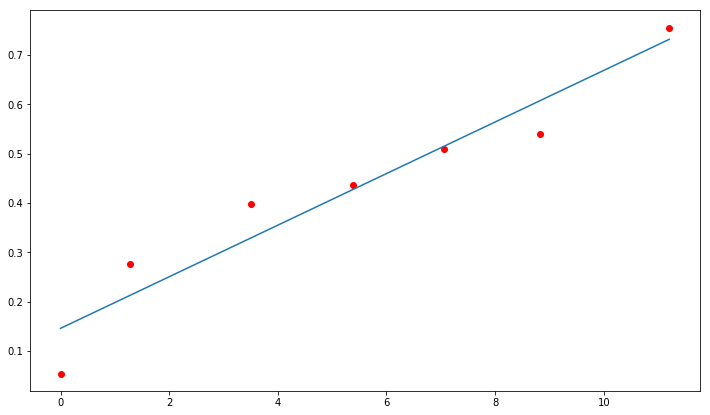

In [43]:
ploscice = [
    avg([1.35,1.31, 1.2]),
    avg([2.1, 2.34, 2.23]),
    avg([1.95, 1.8, 1.85]),
    avg([1.57, 1.83, 1.67]),
    avg([1.9, 1.57, 1.83]),
    avg([2.38, 2.36, 2.38]),
]

x = [sum(ploscice[:i+1]) for i in range(len(ploscice))]
x = [0] + x
y = [(count(i)[0]/count(i)[1] + count(i+1)[0]/count(i+1)[1])/2 for i in range(11, 25, 2)]

# remove bcg
y = [i-bcg for i in y]

# normalize y
y = [np.log(average/i) for i in y]

k, n, e = graph(x, y)
print(k, e)

[0.16806595]
-0.11168864107640786 [0.12097508]


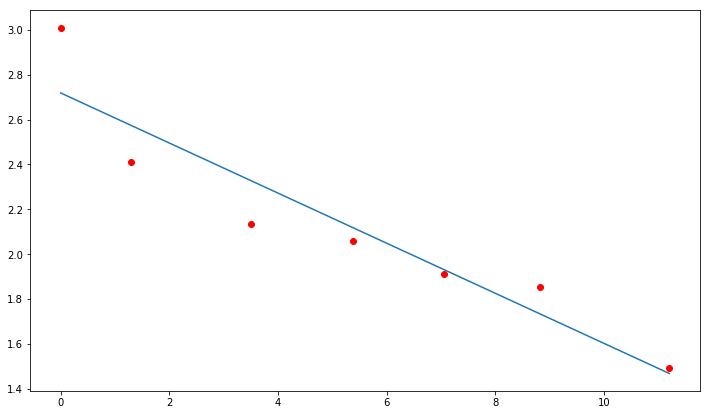

In [44]:
y = [(count(i)[0]/count(i)[1] + count(i+1)[0]/count(i+1)[1])/2 for i in range(11, 25, 2)]
y = [i-bcg for i in y]

# normalize y
y = [i/60 for i in y]

k, n, e = graph(x, y)
print(k, e)